In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pystan
import csv
import pandas as pd
from scipy import stats

In [121]:
import pandas
df = pandas.read_csv('/Users/ewa_anna_szyszka/Desktop/call.csv')
#print(df)
#print df.iloc[:,0]

FileNotFoundError: File b'/Users/ewa_anna_szyszka/Desktop/call.csv' does not exist

In [60]:
counts = df.iloc[:,0]
a = pd.Series(counts).values

In [120]:
counts = a


NameError: name 'a' is not defined

In [84]:
waiting_times_day = np.loadtxt('call_center.csv')

current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
    
print waiting_times_per_hour[11]

[0.0711, 0.125, 0.0121, 0.00513, 0.112, 0.0694, 0.0166, 0.163, 0.0481, 0.0762, 0.175, 0.117, 0.211, 0.0468, 0.0272, 0.134, 0.035, 0.0125, 0.0834, 0.011, 0.0226, 0.0652, 0.132, 0.0738, 0.206, 0.107, 0.0354, 0.0853, 0.0219, 0.106, 0.165, 0.0729, 0.111, 0.0352, 0.0749, 0.00188, 0.00146, 0.0113, 0.0175, 0.167, 0.0736, 0.00292, 0.0378, 0.116, 0.145, 0.161, 0.292, 0.0158, 0.207, 0.481, 0.066, 0.0926, 0.0188, 0.103, 0.262, 0.167, 0.163, 0.0357, 0.137, 0.0699, 0.00632, 0.012, 0.124, 0.159, 0.000179, 0.0441, 0.16, 0.196, 0.131, 0.0731, 0.0282, 0.046, 0.089, 0.0318, 0.0303, 0.0269, 0.184, 0.144, 0.0981, 0.277, 0.0277, 0.000416, 0.225, 0.0538, 0.0422, 0.186, 0.00116, 0.0118, 0.0668, 0.157, 0.12, 0.0285, 0.0204, 0.0702, 0.0692, 0.126, 0.00857, 0.0322, 0.029, 0.0737, 0.0811, 0.0172, 0.121, 0.0589, 0.00973, 0.0797, 0.0996, 0.0862, 0.185, 0.0671, 0.0142, 0.0669, 0.0739, 0.12, 0.566, 0.0179, 0.0483, 0.0382, 0.0109, 0.058, 0.0252, 0.0368, 0.0241, 0.156, 0.0696, 0.015, 0.0759, 0.0431, 0.0798, 0.0816, 0.

In [2]:
counts = [0.0711, 0.125, 0.0121, 0.00513, 0.112, 0.0694, 0.0166, 0.163, 0.0481, 0.0762, 0.175, 0.117, 0.211, 0.0468, 0.0272, 0.134, 0.035, 0.0125, 0.0834, 0.011, 0.0226, 0.0652, 0.132, 0.0738, 0.206, 0.107, 0.0354, 0.0853, 0.0219, 0.106, 0.165, 0.0729, 0.111, 0.0352, 0.0749, 0.00188, 0.00146, 0.0113, 0.0175, 0.167, 0.0736, 0.00292, 0.0378, 0.116, 0.145, 0.161, 0.292, 0.0158, 0.207, 0.481, 0.066, 0.0926, 0.0188, 0.103, 0.262, 0.167, 0.163, 0.0357, 0.137, 0.0699, 0.00632, 0.012, 0.124, 0.159, 0.000179, 0.0441, 0.16, 0.196, 0.131, 0.0731, 0.0282, 0.046, 0.089, 0.0318, 0.0303, 0.0269, 0.184, 0.144, 0.0981, 0.277, 0.0277, 0.000416, 0.225, 0.0538, 0.0422, 0.186, 0.00116, 0.0118, 0.0668, 0.157, 0.12, 0.0285, 0.0204, 0.0702, 0.0692, 0.126, 0.00857, 0.0322, 0.029, 0.0737, 0.0811, 0.0172, 0.121, 0.0589, 0.00973, 0.0797, 0.0996, 0.0862, 0.185, 0.0671, 0.0142, 0.0669, 0.0739, 0.12, 0.566, 0.0179, 0.0483, 0.0382, 0.0109, 0.058, 0.0252, 0.0368, 0.0241, 0.156, 0.0696, 0.015, 0.0759, 0.0431, 0.0798, 0.0816, 0.108, 0.0155, 0.0211, 0.00171, 0.00148, 0.0117, 0.0164, 0.0681, 0.000238, 0.00691, 0.127, 0.0502, 0.00598, 0.0722, 0.0174, 0.0627, 0.00372, 0.0648, 0.0343, 0.101, 0.0751, 0.0111, 0.189, 0.0298, 0.0563, 0.0123, 0.00126, 0.0407, 0.0203, 0.143, 0.0488, 0.0696, 0.0145, 0.0474, 0.0245, 0.172, 0.17, 0.109, 0.182, 0.0357, 0.0729, 0.295, 0.041, 0.207, 0.0725, 0.107, 0.00257, 0.0252, 0.0866, 0.00576, 0.0468, 0.13, 0.0881, 0.115, 0.0321, 0.000605, 0.0392, 0.017, 0.0408, 0.00253, 0.132, 0.298, 0.109, 0.00814, 0.0338, 0.0253, 0.0153, 0.0475, 0.0624, 0.199, 0.265, 0.0202, 0.199, 0.135, 0.0285, 0.0728, 0.124, 0.0165, 0.0385, 0.0843, 0.0988, 0.139, 0.0311, 0.0837, 0.0931, 0.182, 0.0129, 0.00582, 0.0166, 0.109, 0.039, 0.0892, 0.0269, 0.0407, 0.154, 0.109, 0.212, 0.112, 0.0252, 0.00368, 0.0556, 0.103, 0.0754, 0.0135, 0.106, 0.184, 0.0462, 0.0152, 0.0438, 0.105, 0.0283, 0.0417, 0.229, 0.103, 0.0628, 0.0499, 0.122, 0.0227, 0.0451, 0.164, 0.121, 0.0665, 0.00797, 0.113, 0.0421, 0.166, 0.062, 0.129, 0.0966, 0.0167, 0.211, 0.0155, 0.129, 0.0595, 0.0219, 0.105, 0.0483, 0.0959, 0.064, 0.00275, 0.166, 0.0134, 0.0549, 0.235, 0.06, 0.000117, 0.00322, 0.0557, 0.0555, 0.169, 0.211, 0.0521, 0.0485, 0.0173, 0.0644, 0.109, 0.043, 0.0111, 0.215, 0.114, 0.0552, 0.00457, 0.219, 0.314, 0.049, 0.0113, 0.0513, 0.151, 0.00505, 0.0232, 0.0637, 0.0347, 0.0247, 0.000251, 0.0439, 0.00442, 0.124, 0.115, 0.0601, 0.209, 0.422, 0.0646, 0.00895, 0.047, 0.125, 0.0196, 0.187, 0.0125, 0.00415, 0.0394, 0.035, 0.046, 0.0236, 0.0551, 0.152, 0.0371, 0.00205, 0.0499, 0.0565, 0.0341, 0.0509, 0.0589, 0.0456, 0.0365, 0.00266, 0.0681, 0.0565, 0.0045, 0.0144, 0.0601, 0.0303, 0.0349, 0.0441, 0.0328, 0.0733, 0.0488, 0.0717, 0.269, 0.0997, 0.0157, 0.00706, 0.0426, 0.149, 0.0473, 0.0846, 0.0519, 0.0223, 0.0848, 0.0145, 0.00368, 5.87e-05, 0.0163, 0.0841, 0.171, 0.0538, 0.0445, 0.147, 0.0236, 0.115, 0.193, 0.00451, 0.014, 0.0687, 0.00123, 0.13, 0.0513, 0.0662, 0.15, 0.133, 0.0459, 0.0777, 0.0442, 0.106, 0.0114, 0.00198, 0.00188, 0.105, 0.155, 0.098, 0.0762, 0.12, 0.00772, 0.0203, 0.0309, 0.0198, 0.0654, 0.106, 0.0853, 0.000944, 0.000954, 0.109, 0.0293, 0.0693, 0.0262, 0.0767, 0.307, 0.0163, 0.0962, 0.0224, 0.00329, 0.00259, 0.0164, 0.0481, 0.194, 0.00661, 0.111, 0.00302, 0.154, 0.00364, 0.0176, 0.0554, 0.0916, 0.0313, 0.0198, 0.121, 0.145, 0.0539, 0.101, 0.127, 0.0408, 0.0882, 0.0538, 0.0717, 0.104, 0.113, 0.00819, 0.146, 0.000258, 0.0787, 0.115, 0.0136, 0.0367, 0.0852, 0.0565, 0.0666, 0.105, 0.0834, 0.0789, 0.0496, 0.0952, 0.0742, 0.0143, 0.0627, 0.0164, 0.079, 0.021, 0.0803, 0.000524, 0.0245, 0.0097, 0.0599, 0.0469, 0.0176, 0.0708, 0.0731, 0.0614, 0.085, 0.0221, 0.191, 0.00177, 0.0272, 0.0567, 0.0255, 0.00566, 0.122, 0.15, 0.0715, 0.0338, 0.0193, 0.00552, 0.0457, 0.208, 0.174, 0.0026, 0.0656, 0.0742, 0.022, 0.0382, 0.172, 0.0209, 0.04, 0.117, 0.0217, 0.000618, 0.0459, 0.00841, 0.0104, 0.0509, 0.104, 0.000327, 0.0042, 0.0902, 0.0341, 0.091, 0.0569, 0.027, 0.184, 0.0343, 0.19, 0.00992, 0.111, 0.225, 0.0608, 0.0927, 0.0617, 0.0808, 0.00346, 0.161, 0.055, 0.105, 0.506, 0.0304, 0.0163, 0.0973, 0.000753, 0.0564, 0.0032, 0.00947, 0.0337, 0.0905, 0.0918, 0.0315, 0.0155, 0.0425, 0.00194, 0.00797, 0.103, 0.000849, 0.00948, 0.0641, 0.0765, 0.0982, 0.00755, 0.0969, 0.0585, 0.102, 0.012, 0.0807, 0.181, 0.255, 0.0239, 0.00207, 0.00591, 0.0988, 0.0383, 0.204, 0.0168, 0.0487, 0.0326, 0.0457, 0.0212, 0.0192, 0.185, 0.0876, 0.00121, 0.0229, 0.023, 0.0986, 0.0831, 0.0192, 0.142, 0.00611, 0.0369, 0.0496, 0.0523, 0.0471, 0.0315, 0.0202, 0.0342, 0.00263, 0.307, 0.0354, 0.0234, 0.133, 0.124, 0.0744, 0.114, 0.102, 0.0694, 0.0626, 0.0245, 0.00579, 0.124, 0.171, 0.212, 0.0113, 0.00475, 0.00489, 0.0727, 0.0388, 0.0584, 0.207, 0.0665, 0.143, 0.0714, 0.192, 0.197, 0.053, 0.0309, 0.0151, 0.0495, 0.0143, 0.0837, 0.138, 0.00898, 0.195, 0.0225, 0.0251, 0.0159, 0.121, 0.0887, 0.0277, 0.0282, 0.162, 0.018, 0.28, 0.00839, 0.0286, 0.0063, 0.0313, 0.021, 0.0609, 0.00187, 0.00668, 0.0366, 0.0598, 0.0707, 0.174, 0.109, 0.0608, 0.0313, 0.109, 0.0132, 0.087, 0.00677, 0.018, 0.044, 0.017, 0.158, 0.0442, 0.114, 0.0673, 0.0326, 0.031, 0.0724, 0.14, 0.0186, 0.00151, 0.0302, 0.0386, 0.201, 0.00411, 0.00878, 0.0313, 0.000188, 0.0748, 0.0779, 0.00582, 0.07, 0.0113, 0.00965, 0.151, 0.0443, 0.011, 0.0381, 0.00801, 0.0203, 0.164, 0.0242, 0.0217, 0.0261, 0.0627, 0.000245, 0.0106, 0.00567, 0.0736, 0.02, 0.0391, 0.0105, 0.0925, 0.00756, 0.0102, 0.013, 0.00146, 0.088, 0.0247, 0.063, 0.00596, 0.0107, 0.0358, 0.013, 0.0117, 0.0256, 0.0265, 0.368, 0.00302, 0.00357, 0.0419, 0.0245, 0.0563, 0.109, 0.0796, 0.109, 0.0567, 0.0207, 0.00938, 0.256, 0.0557, 0.113, 0.011, 0.00809, 0.0214, 0.00244, 0.0161, 0.0297, 0.128, 0.0223, 0.0113, 0.0275, 0.0196, 0.0121, 0.0773, 0.0428, 0.0674, 0.0116, 0.0186, 0.129, 0.146, 0.0766, 0.000269, 0.0149, 0.0493, 0.00883, 0.00656, 0.00548, 0.0193, 0.00948, 0.0633, 0.0361, 0.0742, 0.0427, 0.0274, 0.0539, 0.027, 0.0145, 0.0388, 0.0271, 0.0036, 0.0812, 0.0378, 0.0195, 0.0164, 0.0615, 0.101, 0.0605, 0.0494, 0.0609, 0.0538, 0.0205, 0.0187, 0.0147, 0.00858, 0.0905, 0.196, 0.0792, 0.0445, 0.0575, 0.0126, 0.173, 0.0379, 0.104, 0.0854, 0.0465, 0.145, 0.00447, 0.0506, 0.0499, 0.0213, 0.0521, 0.0466, 0.0131, 0.0197, 0.0454, 0.00161, 0.0168, 0.00849, 0.0663, 0.0081, 0.00594, 0.0428, 0.0157, 0.102, 0.0309, 0.0543, 0.0236, 0.0154, 0.0214, 0.106, 0.00881, 0.226, 0.0497, 0.0386, 0.0864, 0.0155, 0.139, 0.116, 0.0409, 0.0534, 0.0877, 0.022, 0.0179, 0.0112, 0.0302, 0.0123, 0.11, 7.21e-06, 0.111, 0.0548, 0.127, 0.00477, 0.13, 0.00288, 0.0602, 0.147, 0.0207, 0.132, 0.00212, 0.0246, 0.0776, 0.0598, 0.114, 0.0272, 0.0079, 0.0285, 0.0111, 0.103, 0.296, 0.0313, 0.0384, 0.00446, 0.0657, 0.0114, 0.342, 0.0434, 0.0266, 0.109, 0.00581, 0.0155, 0.0322, 0.046, 0.0816, 0.056, 0.0124, 0.0329, 0.126, 0.0381, 0.0393, 0.0154, 0.00345, 0.00226, 0.114, 0.0881, 0.00316, 0.0388, 0.111, 0.0139, 0.0205, 0.0119, 0.0705, 0.0219, 0.0765, 0.0729, 0.0485, 0.00661, 0.169, 0.00679, 0.0538, 0.00537, 0.01, 0.047, 0.0325, 0.0668]

In [3]:
# This is a partial Stan model. Look up how to define the multinomial
# and dirichlet distributions in your likelihood and prior.

stan_code = """

data {
    int<lower=1> C;    // number of calls in 11th
    real<lower=0> alpha;   // prior hyperparameters for gamma
    real<lower=0> beta;   // prior hyperparameters for gamma
    real<lower=0> counts[C];   
}

parameters {
    real<lower=0> lambda; 
}

model {
    lambda ~ gamma(alpha,beta);
    counts ~ exponential(lambda);   
    }
"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b0a08eb69689e028ad4d67005af9e9b7 NOW.


In [4]:
stan_data = {
    'C': 892,
    'alpha': 0.5,
    'beta': 0.5,
    'counts': counts,
}

results = stan_model.sampling(data=stan_data)

In [10]:
print(results)

Inference for Stan model: anon_model_b0a08eb69689e028ad4d67005af9e9b7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda  14.77    0.01   0.49  13.83  14.44  14.77  15.11  15.72   1112    1.0
lp__   1511.3    0.02   0.69 1509.4 1511.2 1511.6 1511.8 1511.8   1891    1.0

Samples were drawn using NUTS at Mon Oct 15 12:52:55 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 95% interval over λ: [13.83335519 15.71573516]


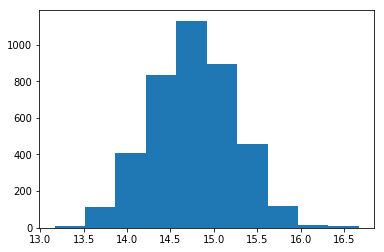

In [9]:
samples = results.extract()
plt.hist(samples['lambda'])
print('Posterior 95% interval over λ:', np.percentile(samples['lambda'], [2.5, 97.5]))

In [ ]:
#task 2

In [56]:
stan_code2 = """

data {
    int<lower=0> C;                     
    real dataset[C];                   
    real mu;                            
    real<lower=0> nu;                  
    real<lower=0> alpha;               
    real<lower=0> beta;                 
}

parameters {
    real y;                       
    real<lower=0> sig;         
}

model {
    y ~ normal(mu, sqrt(sig / nu));    
    sig ~ inv_gamma(alpha, beta);      
    dataset ~ normal(y, sqrt(sig));    
}

"""

stan_model2 = pystan.StanModel(model_code=stan_code2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d5c3dd33cd987b0cda7063fea8c97811 NOW.


In [57]:
stan_data2 = {
    'C': 892,      
    'dataset': counts,      
    'mu': 0.06708854362107623,              
    'nu': 0.004621096164734201,          
    'alpha': 0.5,
    'beta': 0.5}

results2 = stan_model2.sampling(data=stan_data2)

In [42]:
print (np.mean(counts))
print (np.var(counts))

0.06708854362107623
0.004621096164734201


In [65]:
print(results2)

#y is the mean
#sig is the varriance 

Inference for Stan model: anon_model_d5c3dd33cd987b0cda7063fea8c97811.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
y      0.07  3.9e-5 2.5e-3   0.06   0.07   0.07   0.07   0.07   4083    1.0
sig  5.7e-3  6.5e-6 2.8e-4 5.2e-3 5.6e-3 5.7e-3 5.9e-3 6.3e-3   1828    1.0
lp__ 1856.7    0.02   1.01 1854.0 1856.4 1857.0 1857.5 1857.7   1829    1.0

Samples were drawn using NUTS at Mon Oct 15 14:20:25 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [68]:
samples2 = results2.extract()

print('Posterior 95% interval over σ2 :', np.percentile(samples2['sig'], [2.5, 97.5]))

print('Posterior 95% interval over μ :', np.percentile(samples2['y'], [2.5, 97.5]))

Posterior 95% interval over σ2 : [0.00523667 0.00632172]
Posterior 95% interval over μ : [0.06214581 0.07206031]


In [99]:
print (len(samples2['y']))

print ("chosing 10 random samples of μ")
sam10 = np.random.choice(samples2['y'],10)
print (sam10)

print(" ")
print ("chosing 10 random samples of σ2")
sam10_2 = np.random.choice(samples2['sig'],10)
print (sam10_2)

4000
chosing 10 random samples of μ
[0.06867254 0.06680793 0.06942021 0.06500477 0.06391799 0.0667857
 0.07193676 0.06723667 0.06376819 0.06586556]
 
chosing 10 random samples of σ2
[0.0056459  0.00577479 0.00567503 0.00585189 0.00560737 0.00588327
 0.00574135 0.00552224 0.00584988 0.00573965]


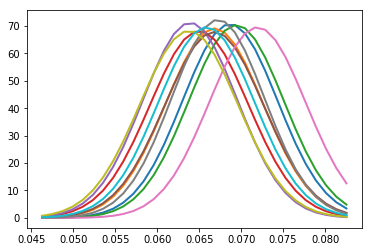

In [110]:
for i in range(len(sam10)):
    mu = sam10[i]
    sigma = sam10_2[i]# mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2)

In [ ]:
#task3

In [125]:
dat = np.loadtxt('C:/Users/Vinic/Desktop/hrtem.csv')
#print (dat)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [27]:
stan_code = """

data {
    int<lower=0> C;    // number of calls in 11th
    real<lower=0> alpha;   // prior hyperparameters for norml inverse gamma
    real<lower=0> beta;   // prior hyperparameters for norml inverse gamma
    real<lower=0> v; //prior hyperparameter for 
    real mu; //prior hyperparameter for norml inverse gamma
    
    real counts[C]; //data  
}

parameters {
    real x;
    real<lower=0> v;
}

model {
    x ~  normal(mu,v) //normal likelihood
    variance ~ inv_gamma(alpha,beta);
    counts ~ normal(sqrt(variance),mu);   
    }
"""


stan_model = pystan.StanModel(model_code=stan_code)

ValueError: Failed to parse Stan model 'anon_model_93a1b0cb58da280858af601d9bb472d8'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

duplicate declaration of variable, name=v; attempt to redeclare as parameter; original declaration as data
Problem with declaration.
  error in 'unknown file name' at line 15, column 20
  -------------------------------------------------
    13: parameters {
    14:     real x;
    15:     real<lower=0> v;
                           ^
    16: }
  -------------------------------------------------



In [23]:
stan_data = {
    'C': 892,
    'dataset': counts,
    'alpha': 0.5,
    'beta': 0.5,
    'v': 0.004621096164734201,
    'mu': 0.06708854362107623,
    'counts': counts,
}

results = stan_model.sampling(data=stan_data)

0.004621096164734201